# 1. Rancom Forest

#### vs Decision Tree

- 결정트리는 실행이 빠르고 해석이 용이해서 널리 활용되나, 훈련데이터에 과대적합이 되는 경향이 있다.
- 랜덤포레스트는 이 문제를 회피할 수 있는 기법
  - 기본 아이디어는 조금씩 다른 여러 결정트리들이 비교적 잘 예측하나 과대적합 경향이 있으므로 \
    서로 다른 방향으로 과대적합되는 경우가 많으며, 과대적합된 모형들의 평균을 통해서 더 일반화된 모형을 만들 수 있음
    
- 부트스트랩 샘플
  - 랜덤포레스트의 가장 중요한 특징은 개별 트리들이 랜덤하게 서로 독립적으로 만들어져야 한다는 것
  - 이를 위해 데이터에서 무작위 중복 추출을 통해 전체 데이터 수만큼 임의 샘플을 만들어서 사용
  - 이를 부트스트랩 샘플이라고 한다.
- ex)
  - a = [1,2,3,4]
  - 부트스트랩 샘플링: a1=[1,1,3,4], a2=[3,2,1,1], a3=[2,4,4,3], ...
  
### 결정사항(주요 parameter)
- n_estimators: 생성할 트리의 개수
- max_features: 분류를 위해 사용할 특성(변수)의 개수

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from dtreeplt import dtreeplt

### 1.1 make_moons 데이터

In [2]:
# 1. toy 데이터 생성하기

X, y = datasets.make_moons(n_samples=100, noise=0.25, random_state=3)

In [3]:
# 1.1 데이터 확인

X.shape

(100, 2)

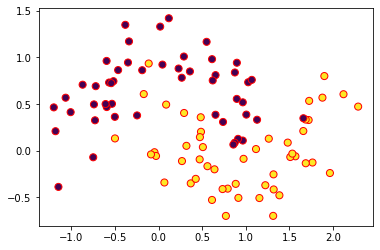

In [4]:
plt.scatter(X[:,0], X[:,1], edgecolors='red', s=50, c=y)

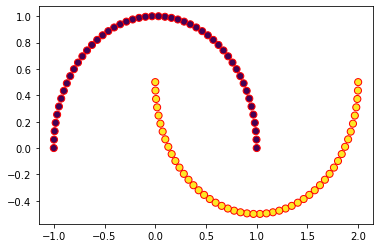

In [5]:
# 노이즈를 섞지 않으면

X0, y0 = datasets.make_moons(n_samples=100, random_state=3)
plt.scatter(X0[:,0], X0[:,1], edgecolors='red', s=50, c=y0)

In [6]:
# 1.2 데이터 분할

X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size=0.2, random_state=42)

In [7]:
# 1.3 분할 데이터 확인

X_train.shape, y_train.shape

((80, 2), (80,))

In [8]:
# 2. Random  Forest 모델링을 위한 객체 생성

forest = RandomForestClassifier(n_estimators=5, random_state=5)

# 3. 모델 적합

forest.fit(X_train, y_train)

# 4. 결과 확인

print('train accuracy {:.2f}'.format(forest.score(X_train, y_train)))
print('test accuracy {:.2f}'.format(forest.score(X_test, y_test)))

RandomForestClassifier(n_estimators=5, random_state=5)

In [9]:
# 2. Random  Forest 모델링을 위한 객체 생성

forest = RandomForestClassifier(n_estimators=5, random_state=0)
# 3. 모델 적합

forest.fit(X_train, y_train)

# 4. 결과 확인

print('train accuracy {:.2f}'.format(forest.score(X_train, y_train)))
print('test accuracy {:.2f}'.format(forest.score(X_test, y_test)))

train accuracy 0.97
test accuracy 0.80


In [11]:
# 5. 트리 확인
forest.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=209652396),
 DecisionTreeClassifier(max_features='auto', random_state=398764591),
 DecisionTreeClassifier(max_features='auto', random_state=924231285),
 DecisionTreeClassifier(max_features='auto', random_state=1478610112),
 DecisionTreeClassifier(max_features='auto', random_state=441365315)]

In [12]:
# 6. 개별 트리

In [13]:
from sklearn.tree import export_graphviz
from IPython import display
import graphviz

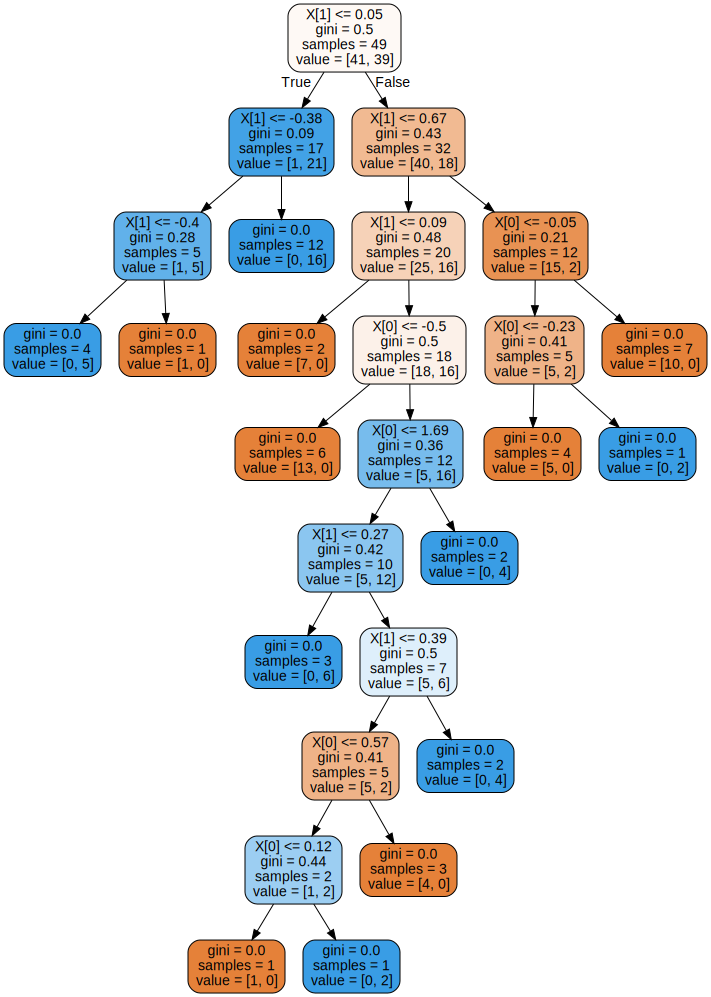

In [14]:
n=2
filename="rf{}.dot".format(str(n))

export_graphviz(forest.estimators_[n], out_file=filename,
               rounded=True, proportion=False,
               filled=True, precision=2)

with open(filename) as f1:
    dot_graph=f1.read()
    
graphviz.Source(dot_graph)

### meaning of samples and value?? (각 개별트리에서)

In [15]:
a = np.random.choice(80,80,replace=True)

In [16]:
len(a) # value 수

80

In [17]:
len(np.unique(a)) # sample 수: 중복이 제외됨

52

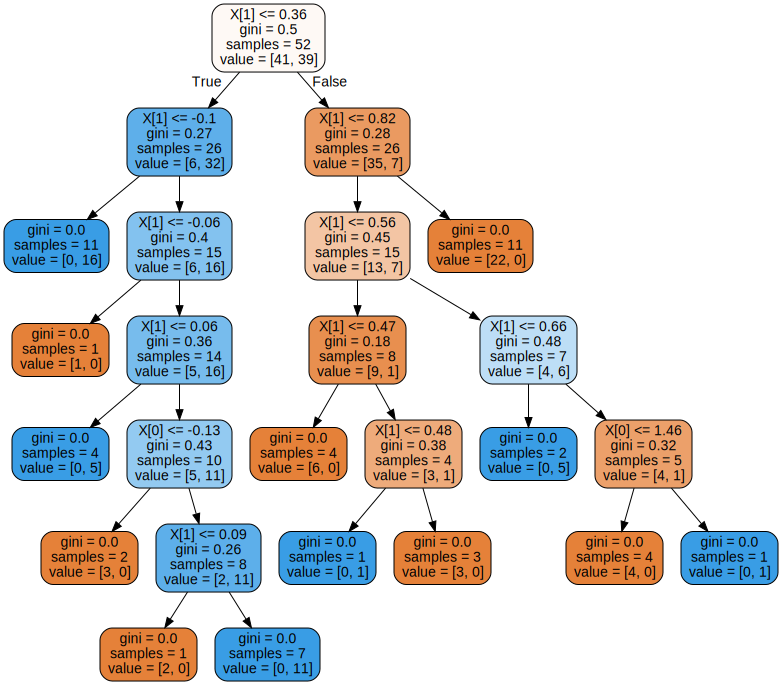

In [18]:
n=1
filename="rf{}.dot".format(str(n))

export_graphviz(forest.estimators_[n], out_file=filename,
               rounded=True, proportion=False,
               filled=True, precision=2)

with open(filename) as f1:
    dot_graph=f1.read()
    
graphviz.Source(dot_graph)

# 2. Gradient Tree Boosting

** 특징

- 여러 개의 결정트리를 묶어 강력한 모델을 만듦
- RF와 달리 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 생성 \
  --> 무작위성이 없음
- 강력한 사전 가지치기 사용
- 보통 5가지 이하의 얕은 트리를 사용 --> 적은 메모리
- 얕은 트리(weak learner)를 많이 연결, 각 트리는 데이터의 일부에 대해서만 예측을 수행 \
  --> 트리를 많이 추가할수록 성능이 좋아짐
  
** 주요 parameter

- 사전 가지치기, 트리 개수 외
- learning rate: 이전 트리의 오차를 얼마나 강하게 보정할 것인지를 제어 \
  --> 학습률이 크면 보정을 강하게 하므로 모델의 복잡성 증가

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

In [20]:
# 1. 데이터 로딩

iris = datasets.load_iris()

In [21]:
# 2. 데이터 분할

X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size=0.3, random_state=10)

In [22]:
# 3. 모델 객체 생성

gtb = GradientBoostingClassifier()

In [23]:
# 4. fitting model

gtb.fit(X_train, y_train)

GradientBoostingClassifier()

In [24]:
# 5. 훈련 결과 확인

print('train accuracy {:.3f}'.format(gtb.score(X_train, y_train)))
print('test accuracy {:.3f}'.format(gtb.score(X_test, y_test)))

train accuracy 1.000
test accuracy 0.978


#### parameter adjustment (max_depth=2)

In [25]:
gtb_depth = GradientBoostingClassifier(max_depth=2)
gtb_depth.fit(X_train, y_train)
print('train accuracy {:.3f}'.format(gtb_depth.score(X_train, y_train)))
print('test accuracy {:.3f}'.format(gtb_depth.score(X_test, y_test)))

train accuracy 1.000
test accuracy 0.956


In [26]:
train_acc = []
test_acc = []
n_esti = range(5,201,5)

for n in n_esti:
    gtb_depth_n = GradientBoostingClassifier(n_estimators = n, random_state = n, max_depth=2)
    gtb_depth_n.fit(X_train, y_train)
    
    train_acc.append(gtb_depth_n.score(X_train, y_train))
    test_acc.append(gtb_depth_n.score(X_test, y_test))

In [27]:
for n in range(len(n_esti)):
    print('If n_estimators={},'.format((n+1)*5))
    print('   train accuracy :{:.3f}'.format(train_acc[n]))
    print('   test accuracy  :{:.3f}'.format(test_acc[n]))
    print()

If n_estimators=5,
   train accuracy :0.952
   test accuracy  :0.978

If n_estimators=10,
   train accuracy :0.952
   test accuracy  :0.978

If n_estimators=15,
   train accuracy :0.962
   test accuracy  :1.000

If n_estimators=20,
   train accuracy :0.981
   test accuracy  :1.000

If n_estimators=25,
   train accuracy :0.981
   test accuracy  :1.000

If n_estimators=30,
   train accuracy :0.990
   test accuracy  :1.000

If n_estimators=35,
   train accuracy :0.990
   test accuracy  :1.000

If n_estimators=40,
   train accuracy :0.990
   test accuracy  :1.000

If n_estimators=45,
   train accuracy :1.000
   test accuracy  :1.000

If n_estimators=50,
   train accuracy :1.000
   test accuracy  :1.000

If n_estimators=55,
   train accuracy :1.000
   test accuracy  :1.000

If n_estimators=60,
   train accuracy :1.000
   test accuracy  :1.000

If n_estimators=65,
   train accuracy :1.000
   test accuracy  :0.978

If n_estimators=70,
   train accuracy :1.000
   test accuracy  :0.956

If n_es

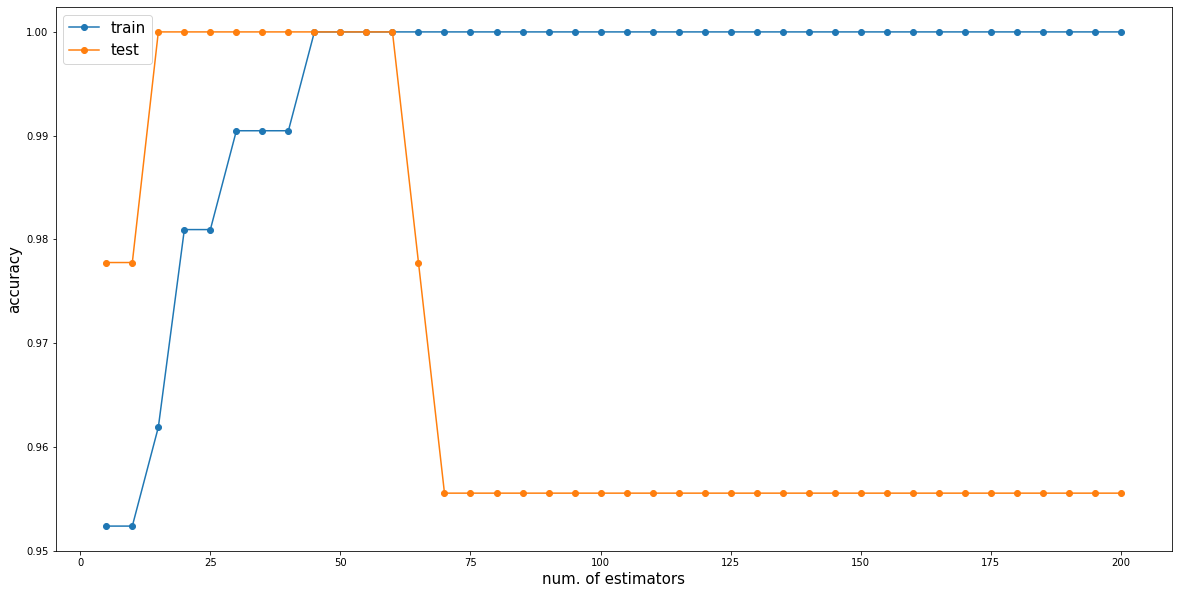

In [28]:
# 6. estimator 변화에 따른 결과

plt.figure(figsize=(20,10))
plt.plot(n_esti, train_acc, label='train', marker='o')
plt.plot(n_esti, test_acc, label='test', marker='o')
plt.ylabel('accuracy',fontsize=15)
plt.xlabel('num. of estimators', fontsize=15)
plt.xticks()
plt.legend(fontsize=15)

## 45, 50, 55, 60

## cf) SMOTE

- Imbalanced dataset --> balanced dataset
- feature selection

---

In [29]:
cancer = datasets.load_breast_cancer()

In [30]:
X=cancer.data
y=cancer.target

X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size=0.2, random_state=10)

In [31]:
forest = RandomForestClassifier(n_estimators=10, random_state=10)

forest.fit(X_train, y_train)

print('train accuracy {:.3f}'.format(forest.score(X_train, y_train)))
print('test accuracy {:.3f}'.format(forest.score(X_test, y_test)))

train accuracy 1.000
test accuracy 0.965


In [35]:
train_acc = []
test_acc = []
n_esti = range(5,201,5)

for n in n_esti:
    gtb_depth_n = GradientBoostingClassifier(n_estimators = n, random_state = n)
    gtb_depth_n.fit(X_train, y_train)
    
    train_acc.append(gtb_depth_n.score(X_train, y_train))
    test_acc.append(gtb_depth_n.score(X_test, y_test))

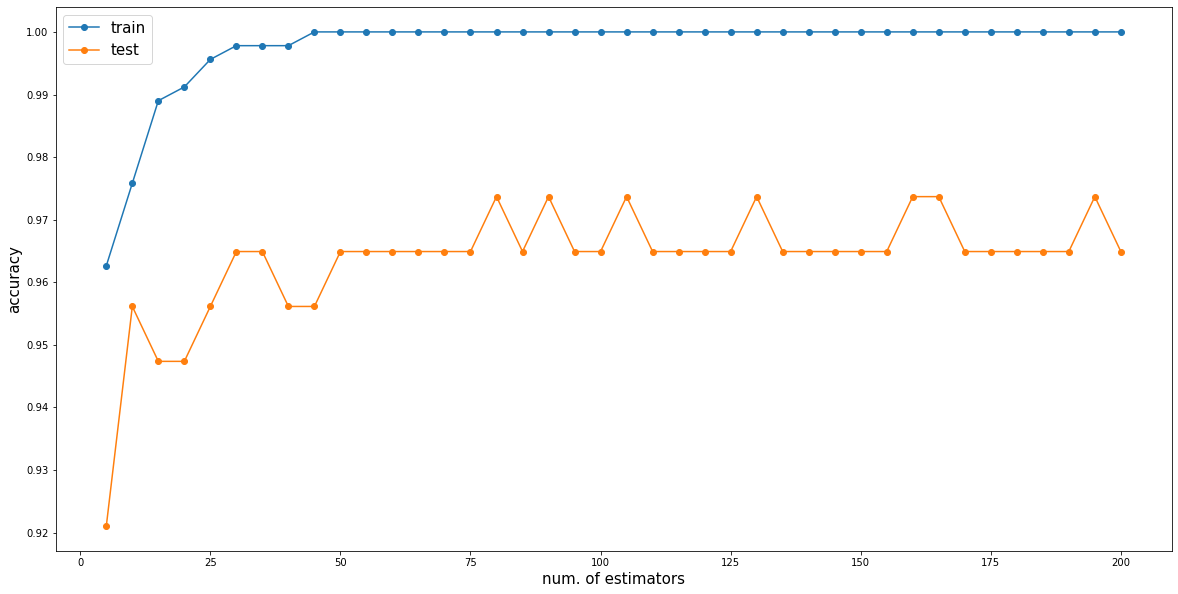

In [36]:
plt.figure(figsize=(20,10))
plt.plot(n_esti, train_acc, label='train', marker='o')
plt.plot(n_esti, test_acc, label='test', marker='o')
plt.ylabel('accuracy',fontsize=15)
plt.xlabel('num. of estimators', fontsize=15)
plt.xticks()
plt.legend(fontsize=15)

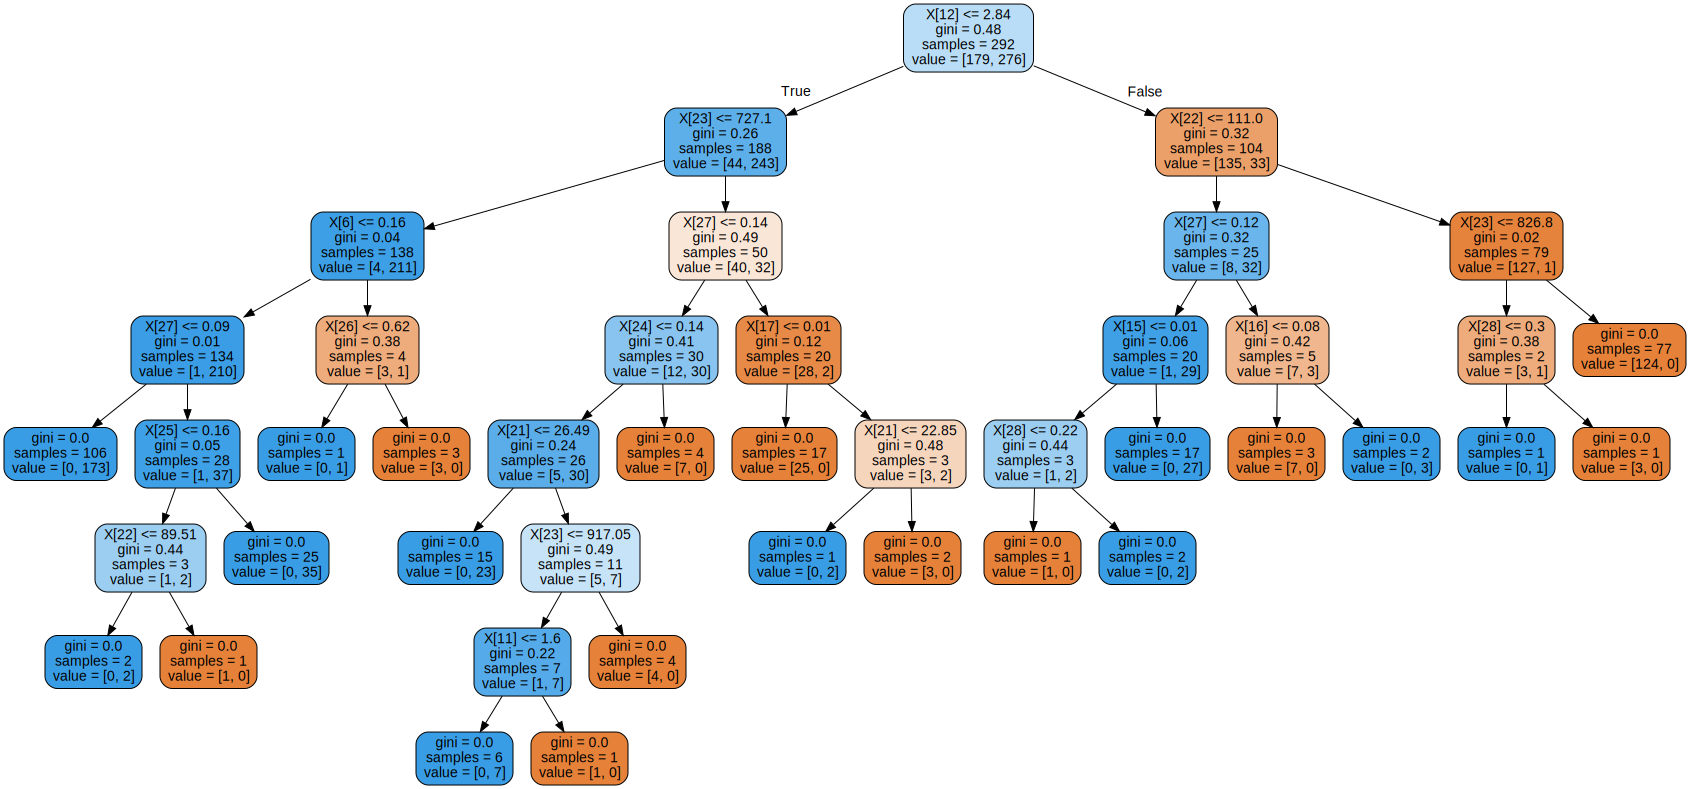

In [32]:
n=2
filename="rf{}.dot".format(str(n))

export_graphviz(forest.estimators_[n], out_file=filename,
               rounded=True, proportion=False,
               filled=True, precision=2)

with open(filename) as f1:
    dot_graph=f1.read()
    
graphviz.Source(dot_graph)